# Problem 3: Implicit ODE solvers

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from TestProblems import van_der_pol_model, prey_predator_model, CSTR_1state_model, CSTR_3state_model

## Stability plot

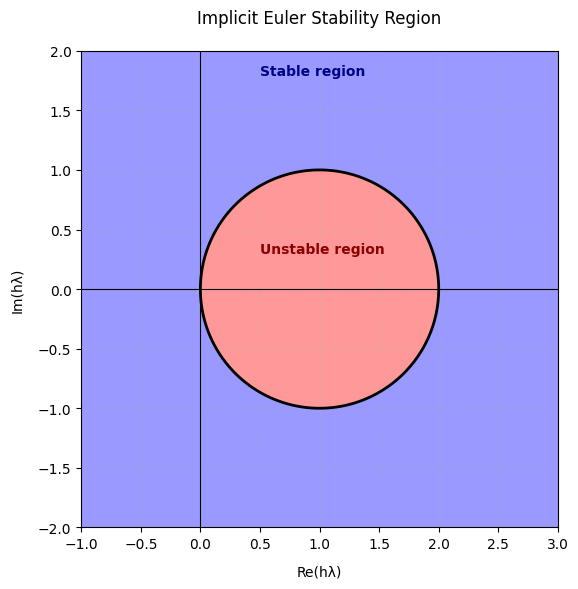

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid in the complex plane
x = np.linspace(-1, 3, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for Implicit Euler: R(z) = 1/(1 - z)
R = 1 / (1 - Z)
R_mag = np.abs(R)

# Create figure
plt.figure(figsize=(7, 6))

# Plot stable (red) and unstable (blue) regions
plt.contourf(X, Y, R_mag <= 1, levels=[0, 0.5, 1.5], 
             colors=['red', 'blue'], alpha=0.4)

# Draw stability boundary (|R(z)| = 1)
plt.contour(X, Y, R_mag, levels=[1], colors='black', linewidths=2)



# Add axes and formatting
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Implicit Euler Stability Region", pad=20)
plt.xlabel("Re(hλ)", labelpad=10)
plt.ylabel("Im(hλ)", labelpad=10)
plt.gca().set_aspect('equal')

# Add legend and annotations (MATCHING YOUR UPDATED STYLE)
plt.text(0.5, 0.3, "Unstable region", color='darkred', weight='bold')  # Left half-plane is stable
plt.text(0.5, 1.8, "Stable region", color='darkblue', weight='bold')  # Right half-plane

plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(-1, 3)  # Slightly extended to show boundary
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()

## Prey-predator problem